A local school district has a goal to reach a 95% graduation rate by the end of the decade by identifying students who need intervention before they drop out of school. As a software engineer contacted by the school district, your task is to model the factors that predict how likely a student is to pass their high school final exam, by constructing an intervention system that leverages supervised learning techniques. The board of supervisors has asked that you find the most effective model that uses the least amount of computation costs to save on the budget. You will need to analyze the dataset on students' performance and develop a model that will predict a given student will pass, quantifying whether an intervention is necessary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("student-data.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,no
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,yes
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,yes


In [5]:
df.shape

(395, 31)

In [6]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [7]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
passed         2
dtype: int64

In [8]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [9]:
#there is no null values present in the dataset.

In [10]:
num_features=[i for i in df.columns if df[i].dtypes!='O']

In [11]:
cat_features=[i for i in df.columns if df[i].dtypes=='O']

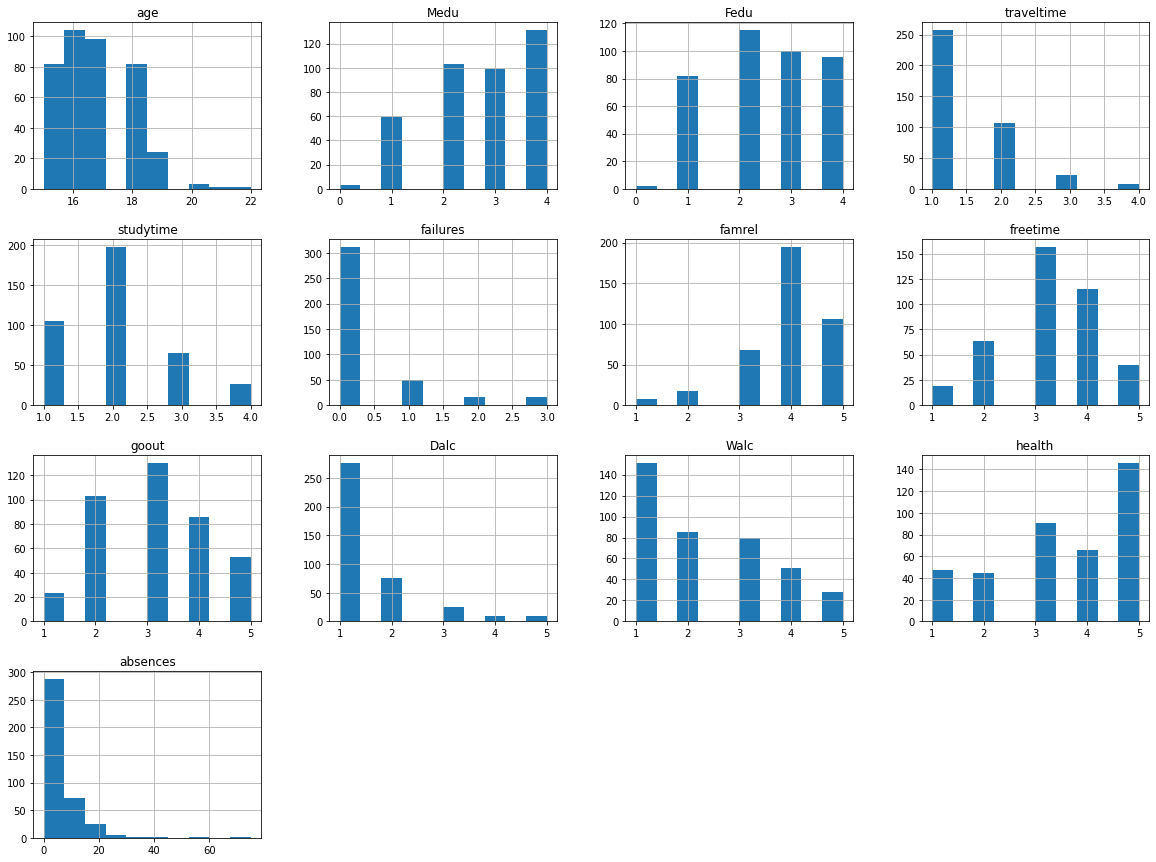

In [12]:
fregraph=df[num_features]
fregraph.hist(figsize=(20,15))
plt.show()

#### Data preprocessing

In [13]:
# Encoding target variable
enc = {'yes':1, 'no':0}
df['passed'] = df['passed'].map(enc)

Text(0.5, 1.0, 'Correlation between variables')

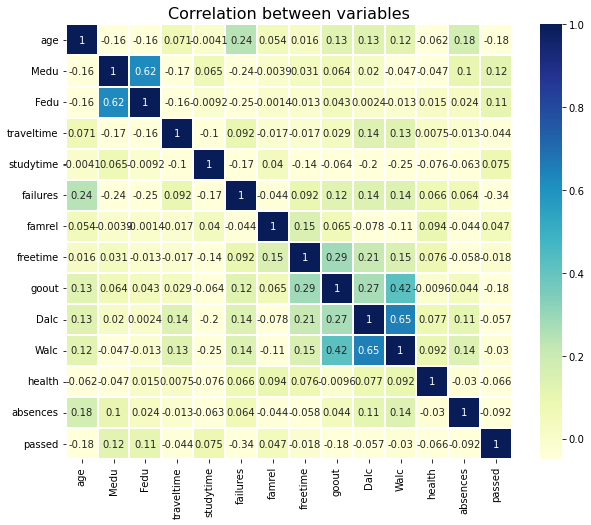

In [14]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, vmin=-.05,vmax=1,linewidths=.2,annot=True,cmap='YlGnBu')
plt.title('Correlation between variables',fontsize=16)

In [15]:
#we can drop some 'medu','fedu',dalc,walc depending on the correlation of dependent variable

In [16]:
df.drop(['Walc','Fedu'],axis=1,inplace=True)

#### Encoding

In [17]:
df[cat_features].head(2)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,0
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,0


In [20]:
df[cat_features].nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
passed        2
dtype: int64

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
from sklearn.preprocessing import LabelEncoder
lblecdr = LabelEncoder()
cat = ['school', 'sex', 'address', 'famsize', 'Pstatus',
        'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']
for f in cat:
    df[f] = lblecdr.fit_transform(df[[f]])

In [24]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,passed
0,0,0,18,1,0,0,4,at_home,teacher,course,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,3,6,0
1,0,0,17,1,0,1,1,at_home,other,course,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,3,4,0
2,0,0,15,1,1,1,1,at_home,other,other,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,10,1
3,0,0,15,1,0,1,4,health,services,home,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,5,2,1
4,0,0,16,1,0,1,3,other,other,home,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,5,4,1


In [25]:
df=pd.get_dummies(df,columns=['Mjob','Fjob','reason'],drop_first=True)

In [26]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,passed,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
0,0,0,18,1,0,0,4,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,3,6,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,17,1,0,1,1,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,3,4,0,0,0,0,0,0,1,0,0,0,0,0


#### Standatrdization

In [27]:
Y=df['passed']
X=df.drop('passed',axis=1)

In [28]:
X.describe()

,school,sex,age,address,famsize,Pstatus,Medu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,0.853165,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,3.554430,5.708861,0.086076,0.356962,0.260759,0.146835,0.045570,0.549367,0.281013,0.073418,0.275949,0.091139,0.265823
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,0.536684,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.390303,8.003096,0.280832,0.479711,0.439606,0.354391,0.208814,0.498188,0.450064,0.261152,0.447558,0.288172,0.442331
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,5.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
from sklearn import preprocessing

In [30]:
standardization=preprocessing.StandardScaler()
X=standardization.fit_transform(X)

In [31]:
X=pd.DataFrame(X)

In [32]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
count,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02
mean,1.866299e-16,-4.834389e-17,1.411529e-15,6.998621e-17,1.281675e-16,-1.503720e-16,8.432074e-18,3.091760e-17,-2.203582e-16,-2.709506e-16,-2.599889e-16,-1.577360e-15,8.207218e-17,3.766326e-17,5.846238e-17,-8.966105e-17,8.923945e-17,1.767925e-16,-1.062441e-16,-1.410967e-16,1.028713e-16,-2.062345e-17,8.769357e-17,1.169248e-16,1.914783e-17,2.105208e-16,2.698264e-17,9.781205e-17,-6.464590e-18,-1.765114e-16,5.396527e-17,-1.489666e-16,1.270432e-16,-1.517773e-17,8.994212e-18,-7.701294e-17
std,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00
min,-3.630498e-01,-9.481764e-01,-1.330954e+00,-1.867789e+00,-6.369411e-01,-2.938392e+00,-2.514630e+00,-1.591714e+00,-6.432495e-01,-1.235351e+00,-4.499436e-01,-3.850400e-01,-1.257656e+00,-9.196708e-01,-1.017881e+00,-1.968894e+00,-4.330127e+00,-2.232677e+00,-7.084498e-01,-3.287804e+00,-2.240828e+00,-1.896683e+00,-5.406987e-01,-1.839649e+00,-7.142362e-01,-3.068922e-01,-7.450625e-01,-5.939190e-01,-4.148576e-01,-2.185071e-01,-1.104129e+00,-6.251760e-01,-2.814871e-01,-6.173483e-01,-3.166679e-01,-6.017217e-01
25%,-3.630498e-01,-9.481764e-01,-5.462869e-01,5.353923e-01,-6.369411e-01,3.403222e-01,-6.853872e-01,2.739448e-01,-6.432495e-01,-1.235351e+00,-4.499436e-01,-3.850400e-01,-1.257656e+00,-9.196708e-01,-1.017881e+00,5.078994e-01,2.309401e-01,4.478927e-01,-7.084498e-01,6.219406e-02,-2.360102e-01,-9.972953e-01,-5.406987e-01,-3.992895e-01,-7.142362e-01,-3.068922e-01,-7.450625e-01,-5.939190e-01,-4.148576e-01,-2.185071e-01,-1.104129e+00,-6.251760e-01,-2.814871e-01,-6.173483e-01,-3.166679e-01,-6.017217e-01
50%,-3.630498e-01,-9.481764e-01,2.383798e-01,5.353923e-01,-6.369411e-01,3.403222e-01,2.292342e-01,2.739448e-01,-6.432495e-01,-4.228585e-02,-4.499436e-01,-3.850400e-01,7.951298e-01,-9.196708e-01,9.824328e-01,5.078994e-01,2.309401e-01,4.478927e-01,-7.084498e-01,6.219406e-02,-2.360102e-01,-9.790798e-02,-5.406987e-01,3.208902e-01,-2.137958e-01,-3.068922e-01,-7.450625e-01,-5.939190e-01,-4.148576e-01,-2.185071e-01,9.056912e-01,-6.251760e-01,-2.814871e-01,-6.173483e-01,-3.166679e-01,-6.017217e-01
75%,-3.630498e-01,1.054656e+00,1.023046e+00,5.353923e-01,1.570004e+00,3.403222e-01,1.143856e+00,2.739448e-01,7.922508e-01,-4.228585e-02,-4.499436e-01,-3.850400e-01,7.951298e-01,1.087346e+00,9.824328e-01,5.078994e-01,2.309401e-01,4.478927e-01,1.411533e+00,1.178860e+00,7.663987e-01,8.014793e-01,5.833854e-01,1.041070e+00,2.866447e-01,-3.068922e-01,1.342169e+00,1.683731e+00,-4.148576e-01,-2.185071e-01,9.056912e-01,1.599549e+00,-2.814871e-01,1.619831e+00,-3.166679e-01,1.661898e+00
max,2.754443e+00,1.054656e+00,4.161713e+00,5.353923e-01,1.570004e+00,3.403222e-01,1.143856e+00,2.139603e+00,3.663251e+00,2.343844e+00,3.589323e+00,2.597133e+00,7.951298e-01,1.087346e+00,9.824328e-01,5.078994e-01,2.309401e-01,4.478927e-01,1.411533e+00,1.178860e+00,1.768808e+00,1.700867e+00,3.955638e+00,1.041070e+00,8.669022e+00,3.258473e+00,1.342169e+00,1.683731e+00,2.410466e+00,4.576510e+00,9.056912e-01,1.599549e+00,3.552561e+00,1.619831e+00,3.157883e+00,1.661898e+00


#### Data Splitting

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.3,random_state=2)

## Building the models

In [38]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

### Logistic regression

In [39]:
logit_model =LogisticRegression()
logit_model.fit(X_train,Y_train)
Y_pred =logit_model.predict(X_test)

In [40]:
print("Accuracy on Logistic Regression Model is :",accuracy_score(Y_test,Y_pred))
print("Precision on Logistic Regression Modelis :",precision_score(Y_test,Y_pred,pos_label='positive',average='micro'))
print("Recall on Logistic Regression Modelis :",recall_score(Y_test,Y_pred,pos_label='positive',average='micro'))
print("f1 on Logistic Regression Modelscoreis :",f1_score(Y_test,Y_pred,pos_label='positive',average='micro'))
print("confusion matrix on Logistic Regression Model",confusion_matrix(Y_test,Y_pred))

Accuracy on Logistic Regression Model is : 0.7142857142857143
Precision on Logistic Regression Modelis : 0.7142857142857143
Recall on Logistic Regression Modelis : 0.7142857142857143
f1 on Logistic Regression Modelscoreis : 0.7142857142857143
confusion matrix on Logistic Regression Model [[15 24]
 [10 70]]


### Random forest

In [41]:
#feaure importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, random_state = 42, test_size = .2) 
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
ypred = rf.predict(X_test)
print("accuracy_score ", accuracy_score(ypred,Y_test) )
print("precision_score ", precision_score(ypred,Y_test) )
print("recall_score ",recall_score(ypred,Y_test) )
print(confusion_matrix(ypred,Y_test))
imp = pd.Series(rf.feature_importances_,index = X_train.columns).sort_values()

accuracy_score  0.7088607594936709
precision_score  0.9423076923076923
recall_score  0.7101449275362319
[[ 7  3]
 [20 49]]


In [52]:
logit_model =LogisticRegression()
logit_model.fit(X_train,Y_train)
thresh = .65
pred_proba=logit_model.predict_proba(X_test)[:,1]
ypredp = (pred_proba>thresh).astype(int)

In [54]:
print("accuracy_score ", accuracy_score(ypredp,Y_test) )
print("precision_score ", precision_score(ypredp,Y_test) )
print("recall_score ",recall_score(ypredp,Y_test) )
confusion_matrix(ypredp,Y_test)

accuracy_score  0.7088607594936709
precision_score  0.7884615384615384
recall_score  0.7735849056603774


array([[15, 11],
       [12, 41]], dtype=int64)

### KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,Y_train)
    y_predicted = classifier.predict(X_test)
    acc = accuracy_score(y_predicted,Y_test)
    accuracy.append(acc)

<AxesSubplot:>

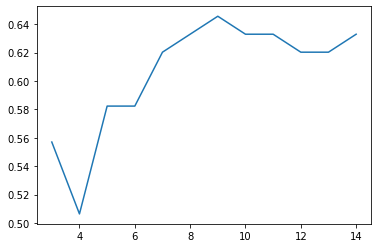

In [56]:
sns.lineplot(x=neighbors,y=accuracy,)

In [57]:
classifier = KNeighborsClassifier(n_neighbors =9, metric ='minkowski')
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
print("accuracy_score ", accuracy_score(y_pred,Y_test) )
print("precision_score ", precision_score(y_pred,Y_test) )
print("recall_score ",recall_score(y_pred,Y_test) )
confusion_matrix(y_pred,Y_test)

accuracy_score  0.6455696202531646
precision_score  0.9615384615384616
recall_score  0.6578947368421053


array([[ 1,  2],
       [26, 50]], dtype=int64)

From these models we can select RandomForestClassifier,logistic regression